# Classification Module
Within this module we will predict if the flight is going to be delayed or not and classify them into those two categories

We will first work with unsampled data from the previous module [Data-Preprocessing, merging the flight data and weather data](https://github.com/GV-9wj/Flight_Delay_Prediction/blob/master/Datapreprocessing3_Merging_Data.ipynb).

After we have seen the classification reports for these modules we will move onto sampled data. We will work with Undersampling and oversampling(SMOTE).

#### Objectives:
1. To classify the given flight as delayed or not using classification models.
2. Run the classification models on unsampled data and print the report for each model.
3. Run the classification models on undersampled data and print the report for each model.
4. Run the classification models on oversampled data and print the report for each model.

#### Classification models used:
1. Logistic regression : [LOOKUP](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
2. Random Forest : [LOOKUP](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
3. Extra trees : [LOOKUP](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html)
4. Decision Trees : [LOOKUP](https://scikit-learn.org/stable/modules/tree.html)
5. Gradient Boosting Classifier : [LOOKUP](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)
6. XGboost Classifier : [LOOKUP](https://xgboost.readthedocs.io/en/latest/python/python_api.html)

In [1]:
# First let us import all the different libraries that we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Looking at the dataframe
Let us look at the dataframe for a little bit of insight into the data

In [2]:
# Readinbg the file 
df = pd.read_csv("Data/Merged_Flight_Weather.csv", index_col = 0)
df.head()

C:\Users\HP\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,index_x,ArrDel15,ArrDelayMinutes,ArrTime,CRSArrTime,CRSDepTime,DayofMonth,DepDel15,DepDelayMinutes,DepTime,...,pressure,cloudcover,DewPointF,WindGustKmph,tempF,WindChillF,humidity,time,date,airport
0,0,0.0,8.0,1610.0,1602,745,1,0.0,0.0,741.0,...,1030,0,23,8,34,29,65,800,2016-01-01,SEA
1,12608,1.0,33.0,1237.0,1204,820,1,0.0,1.0,821.0,...,1030,0,23,8,34,29,65,800,2016-01-01,SEA
2,50768,0.0,0.0,1138.0,1143,759,1,0.0,0.0,754.0,...,1030,0,23,8,34,29,65,800,2016-01-01,SEA
3,51023,0.0,10.0,1401.0,1351,738,1,0.0,2.0,740.0,...,1030,0,23,8,34,29,65,800,2016-01-01,SEA
4,61167,0.0,0.0,1524.0,1527,745,1,0.0,0.0,742.0,...,1030,0,23,8,34,29,65,800,2016-01-01,SEA


In [3]:
# We look at the colums first then the shape
df.columns

Index(['index_x', 'ArrDel15', 'ArrDelayMinutes', 'ArrTime', 'CRSArrTime',
       'CRSDepTime', 'DayofMonth', 'DepDel15', 'DepDelayMinutes', 'DepTime',
       'Dest', 'DestAirportID', 'FlightDate', 'Month', 'Origin',
       'OriginAirportID', 'Quarter', 'Year', 'DeptTime', 'index_y',
       'windspeedKmph', 'winddirDegree', 'weatherCode', 'precipMM',
       'visibility', 'pressure', 'cloudcover', 'DewPointF', 'WindGustKmph',
       'tempF', 'WindChillF', 'humidity', 'time', 'date', 'airport'],
      dtype='object')

In [4]:
# Now the shape of the dataframe
df.shape

(1851091, 35)

In [5]:
# Check for missing values
df.isna().sum()

index_x            0
ArrDel15           0
ArrDelayMinutes    0
ArrTime            0
CRSArrTime         0
CRSDepTime         0
DayofMonth         0
DepDel15           0
DepDelayMinutes    0
DepTime            0
Dest               0
DestAirportID      0
FlightDate         0
Month              0
Origin             0
OriginAirportID    0
Quarter            0
Year               0
DeptTime           0
index_y            0
windspeedKmph      0
winddirDegree      0
weatherCode        0
precipMM           0
visibility         0
pressure           0
cloudcover         0
DewPointF          0
WindGustKmph       0
tempF              0
WindChillF         0
humidity           0
time               0
date               0
airport            0
dtype: int64

In [6]:
# Here we drop all the columns we don't need for our classification
df = df.drop(columns=['index_x', 'time', 'date', 'FlightDate', 'index_y', 'DeptTime','ArrDelayMinutes', 
                      'ArrTime'])
df.head()

,ArrDel15,CRSArrTime,CRSDepTime,DayofMonth,DepDel15,DepDelayMinutes,DepTime,Dest,DestAirportID,Month,...,precipMM,visibility,pressure,cloudcover,DewPointF,WindGustKmph,tempF,WindChillF,humidity,airport
0,0.0,1602,745,1,0.0,0.0,741.0,JFK,12478,1,...,0.0,10,1030,0,23,8,34,29,65,SEA
1,1.0,1204,820,1,0.0,1.0,821.0,PHX,14107,1,...,0.0,10,1030,0,23,8,34,29,65,SEA
2,0.0,1143,759,1,0.0,0.0,754.0,DEN,11292,1,...,0.0,10,1030,0,23,8,34,29,65,SEA
3,0.0,1351,738,1,0.0,2.0,740.0,IAH,12266,1,...,0.0,10,1030,0,23,8,34,29,65,SEA
4,0.0,1527,745,1,0.0,0.0,742.0,ATL,10397,1,...,0.0,10,1030,0,23,8,34,29,65,SEA


In [7]:
# Looking at the new features
df.columns

Index(['ArrDel15', 'CRSArrTime', 'CRSDepTime', 'DayofMonth', 'DepDel15',
       'DepDelayMinutes', 'DepTime', 'Dest', 'DestAirportID', 'Month',
       'Origin', 'OriginAirportID', 'Quarter', 'Year', 'windspeedKmph',
       'winddirDegree', 'weatherCode', 'precipMM', 'visibility', 'pressure',
       'cloudcover', 'DewPointF', 'WindGustKmph', 'tempF', 'WindChillF',
       'humidity', 'airport'],
      dtype='object')

In [8]:
df.shape

(1851091, 27)

In [9]:
df.duplicated().sum()

93

In [10]:
df.drop_duplicates(inplace=True)
df.shape

(1850998, 27)

### Label Encoding using cat.codes
Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form. Machine learning algorithms can then decide in a better way on how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.
Here we are label encoding the `Origin` and the `airport` features, by first converting them to category type and then using `cat.codes`

In [11]:
df["Origin"] = df["Origin"].astype('category')
df["airport"] = df["airport"].astype('category')
df["Dest"] = df["Dest"].astype('category')
# To see if our features have convered to category
df.dtypes

ArrDel15            float64
CRSArrTime            int64
CRSDepTime            int64
DayofMonth            int64
DepDel15            float64
DepDelayMinutes     float64
DepTime             float64
Dest               category
DestAirportID         int64
Month                 int64
Origin             category
OriginAirportID       int64
Quarter               int64
Year                  int64
windspeedKmph         int64
winddirDegree         int64
weatherCode           int64
precipMM            float64
visibility            int64
pressure              int64
cloudcover            int64
DewPointF             int64
WindGustKmph          int64
tempF                 int64
WindChillF            int64
humidity              int64
airport            category
dtype: object

As you can see those both Origin and airport have been converted into category type

In [12]:
df["Origin"] = df["Origin"].cat.codes
df["airport"] = df["airport"].cat.codes
df["Dest"] = df["Dest"].cat.codes
df.head()

,ArrDel15,CRSArrTime,CRSDepTime,DayofMonth,DepDel15,DepDelayMinutes,DepTime,Dest,DestAirportID,Month,...,precipMM,visibility,pressure,cloudcover,DewPointF,WindGustKmph,tempF,WindChillF,humidity,airport
0,0.0,1602,745,1,0.0,0.0,741.0,6,12478,1,...,0.0,10,1030,0,23,8,34,29,65,13
1,1.0,1204,820,1,0.0,1.0,821.0,12,14107,1,...,0.0,10,1030,0,23,8,34,29,65,13
2,0.0,1143,759,1,0.0,0.0,754.0,2,11292,1,...,0.0,10,1030,0,23,8,34,29,65,13
3,0.0,1351,738,1,0.0,2.0,740.0,5,12266,1,...,0.0,10,1030,0,23,8,34,29,65,13
4,0.0,1527,745,1,0.0,0.0,742.0,0,10397,1,...,0.0,10,1030,0,23,8,34,29,65,13


In [13]:
df.dtypes

ArrDel15           float64
CRSArrTime           int64
CRSDepTime           int64
DayofMonth           int64
DepDel15           float64
DepDelayMinutes    float64
DepTime            float64
Dest                  int8
DestAirportID        int64
Month                int64
Origin                int8
OriginAirportID      int64
Quarter              int64
Year                 int64
windspeedKmph        int64
winddirDegree        int64
weatherCode          int64
precipMM           float64
visibility           int64
pressure             int64
cloudcover           int64
DewPointF            int64
WindGustKmph         int64
tempF                int64
WindChillF           int64
humidity             int64
airport               int8
dtype: object

In [14]:
df.Origin.value_counts()

8     209299
14    166915
11    153436
0     146719
2     144147
7     132148
3     125900
13    115701
12    114007
4     100167
9      99559
6      93423
5      89551
1      83486
10     76540
Name: Origin, dtype: int64

In [15]:
df.airport.value_counts()

8     209299
14    166915
11    153436
0     146719
2     144147
7     132148
3     125900
13    115701
12    114007
4     100167
9      99559
6      93423
5      89551
1      83486
10     76540
Name: airport, dtype: int64

In [16]:
df.columns

Index(['ArrDel15', 'CRSArrTime', 'CRSDepTime', 'DayofMonth', 'DepDel15',
       'DepDelayMinutes', 'DepTime', 'Dest', 'DestAirportID', 'Month',
       'Origin', 'OriginAirportID', 'Quarter', 'Year', 'windspeedKmph',
       'winddirDegree', 'weatherCode', 'precipMM', 'visibility', 'pressure',
       'cloudcover', 'DewPointF', 'WindGustKmph', 'tempF', 'WindChillF',
       'humidity', 'airport'],
      dtype='object')

Another way for label encoding is to use `sklearn.preprocessing.LabelEncoder` : [LOOKUP](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)

##### Feature exploration
Since there are no missing values or categorical variables we can continue further and look at the corellation between various features of the dataframe

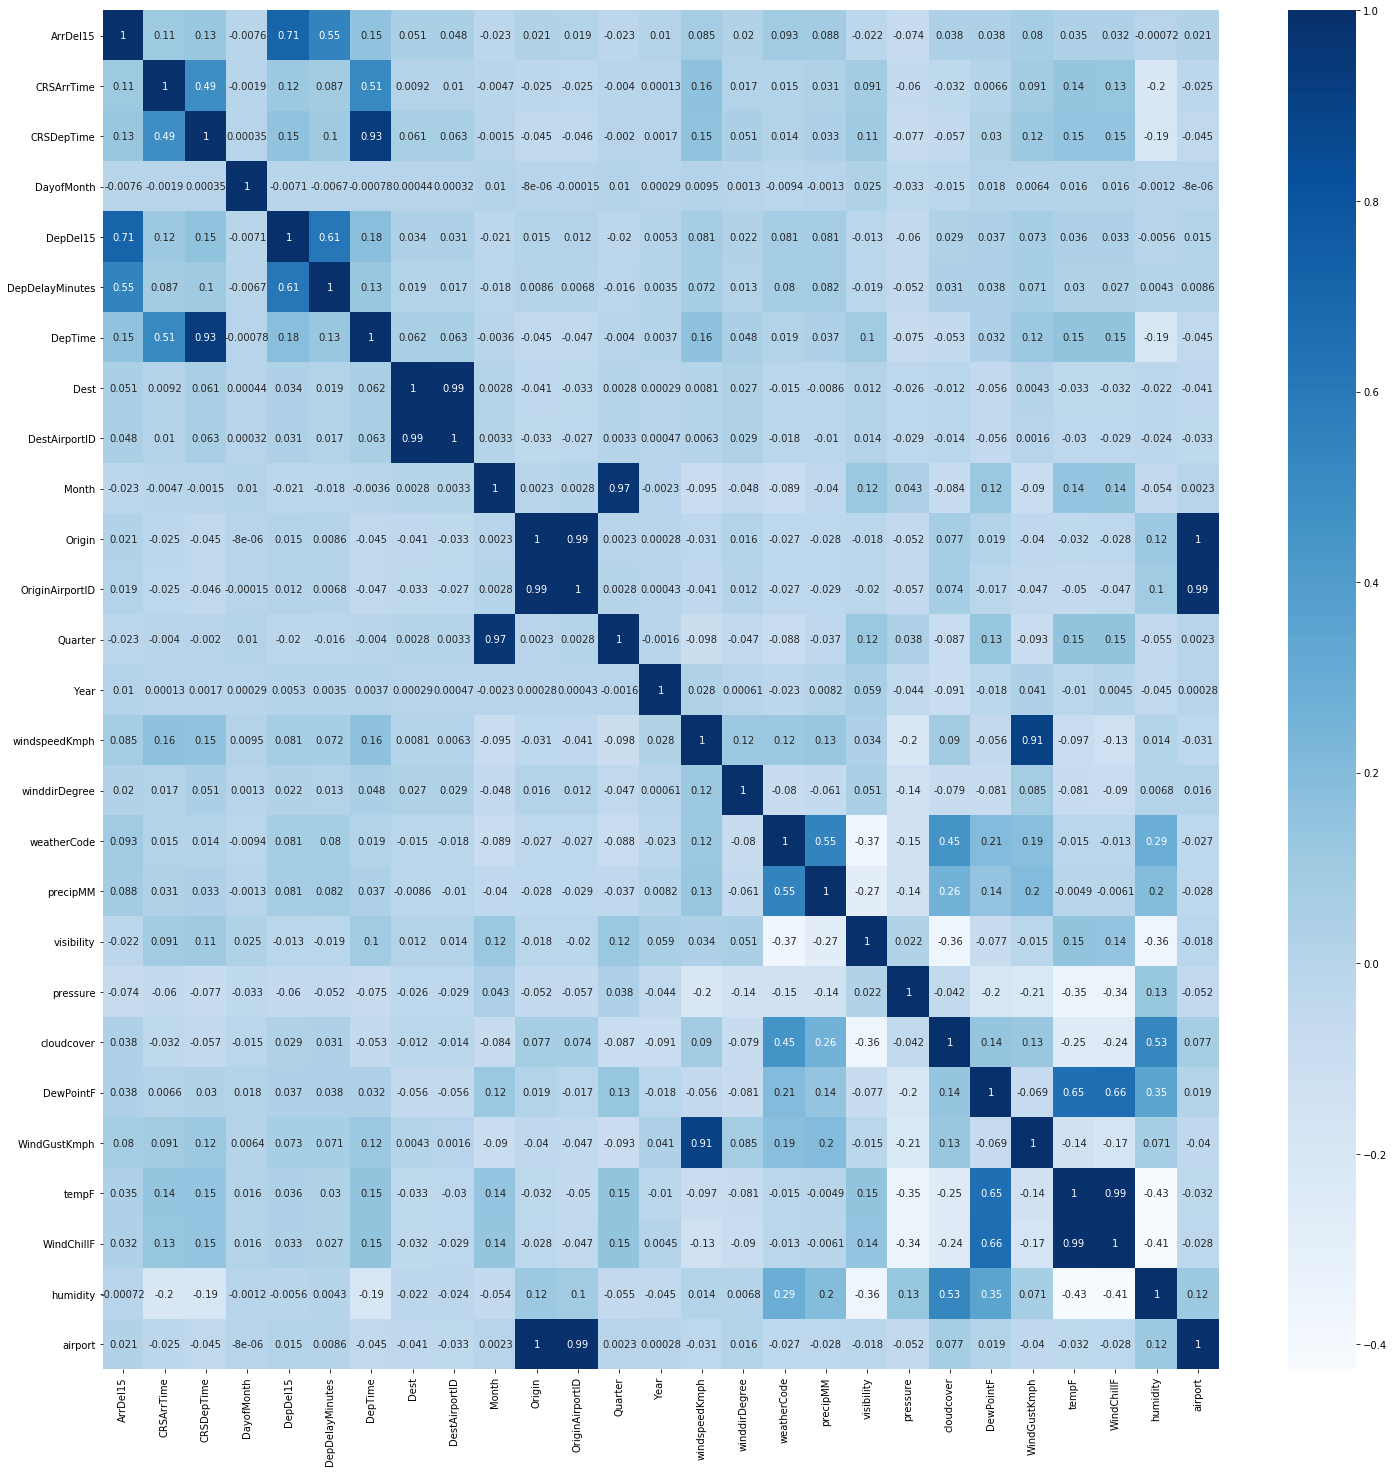

In [17]:
plt.figure(figsize=(25,25))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap='Blues')
plt.show()

In [18]:
df.corr()

,ArrDel15,CRSArrTime,CRSDepTime,DayofMonth,DepDel15,DepDelayMinutes,DepTime,Dest,DestAirportID,Month,...,precipMM,visibility,pressure,cloudcover,DewPointF,WindGustKmph,tempF,WindChillF,humidity,airport
ArrDel15,1.000000,0.110601,0.127240,-0.007595,0.710538,0.546142,0.154322,0.051256,0.048184,-0.023368,...,0.088449,-0.021842,-0.073886,0.037856,0.038140,0.080309,0.035390,0.031992,-0.000720,0.020761
CRSArrTime,0.110601,1.000000,0.487270,-0.001902,0.118568,0.086941,0.513784,0.009244,0.010097,-0.004749,...,0.030528,0.091271,-0.060437,-0.032332,0.006619,0.090938,0.141935,0.132120,-0.204943,-0.024607
CRSDepTime,0.127240,0.487270,1.000000,0.000354,0.154985,0.104760,0.934008,0.061127,0.062914,-0.001498,...,0.032850,0.105889,-0.077368,-0.057288,0.030099,0.115164,0.146884,0.147577,-0.191055,-0.044655
DayofMonth,-0.007595,-0.001902,0.000354,1.000000,-0.007067,-0.006684,-0.000778,0.000443,0.000318,0.010127,...,-0.001259,0.025225,-0.032988,-0.015192,0.018075,0.006418,0.016331,0.015826,-0.001185,-0.000008
DepDel15,0.710538,0.118568,0.154985,-0.007067,1.000000,0.608080,0.183905,0.033684,0.031411,-0.021137,...,0.080523,-0.012637,-0.060215,0.029351,0.036910,0.072551,0.036078,0.033097,-0.005634,0.014527
DepDelayMinutes,0.546142,0.086941,0.104760,-0.006684,0.608080,1.000000,0.127716,0.019076,0.016701,-0.017678,...,0.081938,-0.019312,-0.052188,0.031330,0.038023,0.071245,0.029618,0.027397,0.004276,0.008607
DepTime,0.154322,0.513784,0.934008,-0.000778,0.183905,0.127716,1.000000,0.061829,0.063417,-0.003646,...,0.036953,0.102774,-0.075025,-0.053260,0.031685,0.118263,0.150887,0.149695,-0.193531,-0.045355
Dest,0.051256,0.009244,0.061127,0.000443,0.033684,0.019076,0.061829,1.000000,0.993752,0.002829,...,-0.008627,0.011786,-0.025933,-0.011573,-0.056142,0.004310,-0.032813,-0.031766,-0.021616,-0.040610
DestAirportID,0.048184,0.010097,0.062914,0.000318,0.031411,0.016701,0.063417,0.993752,1.000000,0.003311,...,-0.010310,0.013525,-0.028700,-0.013609,-0.055773,0.001647,-0.029950,-0.028669,-0.023853,-0.033152
Month,-0.023368,-0.004749,-0.001498,0.010127,-0.021137,-0.017678,-0.003646,0.002829,0.003311,1.000000,...,-0.040026,0.121191,0.042888,-0.084233,0.122952,-0.090128,0.142461,0.138033,-0.053684,0.002300


# Un-Sampled Data
We will work the above classifier models using unsampled data, i.e data that has not be altered and predict if the flight is on time or delayed

In this dataframe the variable we need to predict is '`ArrDel15` and therefore we need to divide it into two variables:
* `X` - the input variable which helps us predict, which is all features except for `Arrdel15` and `ArrDelayMinutes`
* `y` - the output variable or the predictor variable, which is basically the column `ArrDel15`

We must then split them into train and test datasets using an inbuilt function from scikit learn called train_test_split : [LOOKUP](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [19]:
y = df['ArrDel15']
X = df.drop(columns = ['ArrDel15'])
# Spplitting the datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1295698, 26), (555300, 26), (1295698,), (555300,))

## Accuracy measurement
There are also a few metrics that we use for checking the accuracy of our model. Some of them are
1. model.score()
2. A classification report that gives us the precision and the recall and also the F1 score, where:
    1. Precision is the fraction of how many of the items that are selected are relevant.
    2. Recall is the fraction of how many relevant items are selected.
    3. F1 score which is the harmonic mean between the Precision and the Recall
3. A confusion matrix which gives us a matrix of the true negatives($C_{0, 0}$), false negatives($C_{1, 0}$), true positives($C_{0, 1}$) false positives($C_{1, 1}$)

In [21]:
import sklearn.metrics

### METHOD
Nearly all our classifiers follow the following method which is
1. Call the classifier
2. Fit it with out train data
3. Run the accuracy metrics for our model

## Logistic Regression
Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression)

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
logistic_model = LogisticRegression(max_iter=500000)
logistic_classifier = logistic_model.fit(X_train, y_train)

In [24]:
y_pred_logistic = logistic_model.predict(X_test)
print("Logistic regression Train Accuracy : {} %".format(logistic_classifier.score(X_train, 
                                                                                   y_train)*100))
print("\nLogistic regression Test Accuracy : {} %".format(sklearn.metrics.accuracy_score(y_test, 
                                                                                 y_pred_logistic)*100))
print("-------------------------------------------------------------------------------------------------")
print("\nClassification Report : \n {}".format(sklearn.metrics.classification_report(y_test, 
                                                                                     y_pred_logistic)))
print("-------------------------------------------------------------------------------------------------")
print("\n Confusion Matrix :- \n{}".format(sklearn.metrics.confusion_matrix(y_test, 
                                                                            y_pred_logistic)))

Logistic regression Train Accuracy : 91.61895750398627 %

Logistic regression Test Accuracy : 91.58040698721412 %
-------------------------------------------------------------------------------------------------

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.92      0.98      0.95    438828
         1.0       0.89      0.68      0.77    116472

    accuracy                           0.92    555300
   macro avg       0.91      0.83      0.86    555300
weighted avg       0.91      0.92      0.91    555300

-------------------------------------------------------------------------------------------------

 Confusion Matrix :- 
[[429014   9814]
 [ 36940  79532]]


## Random Forest
Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes or mean prediction of the individual trees.

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
random_forest_model = RandomForestClassifier()
random_forest_classifier = random_forest_model.fit(X_train,y_train)

In [27]:
y_pred_randomforest = random_forest_model.predict(X_test)
print("Random Forest Clasifier Train Accuracy : {} %".format(random_forest_classifier.score(X_train,
                                                                                            y_train)*100))
print("\nRandom Forest Clasifier Test Accuracy : {} %".format(sklearn.metrics.accuracy_score(y_test, 
                                                                                     y_pred_randomforest)*100))
print("-------------------------------------------------------------------------------------------------")
print("\nClassification Report : \n {}".format(sklearn.metrics.classification_report(y_test, 
                                                                                     y_pred_randomforest)))
print("-------------------------------------------------------------------------------------------------")
print("\n Confusion Matrix :- \n{}".format(sklearn.metrics.confusion_matrix(y_test, 
                                                                            y_pred_randomforest)))

Random Forest Clasifier Train Accuracy : 99.99629543304073 %

Random Forest Clasifier Test Accuracy : 91.81811633351342 %
-------------------------------------------------------------------------------------------------

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.92      0.98      0.95    438828
         1.0       0.89      0.70      0.78    116472

    accuracy                           0.92    555300
   macro avg       0.91      0.84      0.87    555300
weighted avg       0.92      0.92      0.91    555300

-------------------------------------------------------------------------------------------------

 Confusion Matrix :- 
[[428711  10117]
 [ 35317  81155]]


## Extra trees Classifier
Extremely Randomized Trees Classifier(Extra Trees Classifier) is a type of ensemble learning technique which aggregates the results of multiple de-correlated decision trees collected in a “forest” to output it's classification result

In [28]:
from sklearn.ensemble import ExtraTreesClassifier

In [29]:
extra_trees_model = ExtraTreesClassifier()
extra_trees_classifier = extra_trees_model.fit(X_train, y_train)

In [30]:
y_pred_extratrees = extra_trees_model.predict(X_test)
print("Extra trees Clasifier Train Accuracy : {} %".format(extra_trees_classifier.score(X_train,
                                                                                        y_train)*100))
print("\nExtra trees  Clasifier Test Accuracy : {} %".format(sklearn.metrics.accuracy_score(y_test,
                                                                                    y_pred_extratrees)*100))
print("-------------------------------------------------------------------------------------------------")
print("\nClassification Report : \n {}".format(sklearn.metrics.classification_report(y_test, 
                                                                                     y_pred_extratrees)))
print("-------------------------------------------------------------------------------------------------")
print("\n Confusion Matrix :- \n{}".format(sklearn.metrics.confusion_matrix(y_test, 
                                                                            y_pred_extratrees)))

Extra trees Clasifier Train Accuracy : 99.99984564304336 %

Extra trees  Clasifier Test Accuracy : 91.1955699621826 %
-------------------------------------------------------------------------------------------------

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.93      0.96      0.95    438828
         1.0       0.83      0.74      0.78    116472

    accuracy                           0.91    555300
   macro avg       0.88      0.85      0.86    555300
weighted avg       0.91      0.91      0.91    555300

-------------------------------------------------------------------------------------------------

 Confusion Matrix :- 
[[420716  18112]
 [ 30779  85693]]


## Decision trees Classifier
The decision tree classifier creates the classification model by building a decision tree. Each node in the tree specifies a test on an attribute, each branch descending from that node corresponds to one of the possible values for that attribute.

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
decision_trees_model = DecisionTreeClassifier()
decision_trees_classifier = decision_trees_model.fit(X_train, y_train)

In [33]:
y_pred_decisiontrees = decision_trees_model.predict(X_test)
print("Decision Trees Clasifier Train Accuracy : {} %".format(decision_trees_classifier.score(X_train,
                                                                                           y_train)*100))
print("\nDecision Trees Clasifier Test Accuracy : {} %".format(sklearn.metrics.accuracy_score(y_test,
                                                                                      y_pred_decisiontrees)*100))
print("-------------------------------------------------------------------------------------------------")
print("\nClassification Report : \n {}".format(sklearn.metrics.classification_report(y_test, 
                                                                                     y_pred_decisiontrees)))
print("-------------------------------------------------------------------------------------------------")
print("\n Confusion Matrix :- \n{}".format(sklearn.metrics.confusion_matrix(y_test, 
                                                                            y_pred_decisiontrees)))

Decision Trees Clasifier Train Accuracy : 99.99984564304336 %

Decision Trees Clasifier Test Accuracy : 86.77093462992977 %
-------------------------------------------------------------------------------------------------

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.92      0.91      0.92    438828
         1.0       0.68      0.70      0.69    116472

    accuracy                           0.87    555300
   macro avg       0.80      0.81      0.80    555300
weighted avg       0.87      0.87      0.87    555300

-------------------------------------------------------------------------------------------------

 Confusion Matrix :- 
[[399925  38903]
 [ 34558  81914]]


## Gradient Booster Classifier
Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.

In [34]:
from sklearn.ensemble import GradientBoostingClassifier

In [35]:
gradient_boost_model = GradientBoostingClassifier(random_state=0)
gradient_boost_clf = gradient_boost_model.fit(X_train, y_train)

In [36]:
y_pred_gradientboost = gradient_boost_model.predict(X_test)
print("Gradient Booster Clasifier Train Accuracy : {} %".format(gradient_boost_clf.score(X_train,
                                                                                         y_train)*100))
print("\nGradient Booster Clasifier Test Accuracy : {} %".format(sklearn.metrics.accuracy_score(y_test,
                                                                                        y_pred_gradientboost)*100))
print("-------------------------------------------------------------------------------------------------")
print("\nClassification Report : \n {}".format(sklearn.metrics.classification_report(y_test, 
                                                                                     y_pred_gradientboost)))
print("-------------------------------------------------------------------------------------------------")
print("\n Confusion Matrix :- \n{}".format(sklearn.metrics.confusion_matrix(y_test, 
                                                                            y_pred_gradientboost)))

Gradient Booster Clasifier Train Accuracy : 91.71134014253322 %

Gradient Booster Clasifier Test Accuracy : 91.65514136502792 %
-------------------------------------------------------------------------------------------------

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.92      0.98      0.95    438828
         1.0       0.89      0.68      0.77    116472

    accuracy                           0.92    555300
   macro avg       0.91      0.83      0.86    555300
weighted avg       0.92      0.92      0.91    555300

-------------------------------------------------------------------------------------------------

 Confusion Matrix :- 
[[429494   9334]
 [ 37005  79467]]


### XGBoost Classifier
XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework

In [37]:
import xgboost
from xgboost import XGBClassifier
xgboost_model = XGBClassifier()
xbgoost_classifier = xgboost_model.fit(X_train, y_train)

In [38]:
y_pred_xgboost = xgboost_model.predict(X_test)
print("XGBoost Clasifier Train Accuracy : {} %".format(xbgoost_classifier.score(X_train, y_train)*100))
print("\nXGBoost Trees Clasifier Test Accuracy : {} %".format(sklearn.metrics.accuracy_score(y_test, y_pred_xgboost)*100))
print("-------------------------------------------------------------------------------------------------")
print("\nClassification Report : \n {}".format(sklearn.metrics.classification_report(y_test, y_pred_xgboost)))
print("-------------------------------------------------------------------------------------------------")
print("\n Confusion Matrix :- \n{}".format(sklearn.metrics.confusion_matrix(y_test, y_pred_xgboost)))

XGBoost Clasifier Train Accuracy : 92.15496203590652 %

XGBoost Trees Clasifier Test Accuracy : 91.91374032054746 %
-------------------------------------------------------------------------------------------------

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.92      0.98      0.95    438828
         1.0       0.90      0.69      0.78    116472

    accuracy                           0.92    555300
   macro avg       0.91      0.84      0.87    555300
weighted avg       0.92      0.92      0.92    555300

-------------------------------------------------------------------------------------------------

 Confusion Matrix :- 
[[429767   9061]
 [ 35842  80630]]


# Sampled Data
We will now work out models on oversampled and undersampled data.
For the purpose of this project we will be looking at:
* SMOTE oversampling [LOOKUP](https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html)
* Random Undersampling [LOOKUP](https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.under_sampling.RandomUnderSampler.html)

## Considering SMOTE (Synthetic Minority Oversampling Technique)
SMOTE is an oversampling technique that generates synthetic samples from the minority class. It is used to obtain a synthetically class-balanced or nearly class-balanced training set, which is then used to train the classifier.

In [39]:
# Looking at the original value counts
print("Original Number of values: \n{}".format(y_train.value_counts()))

Original Number of values: 
0.0    1024173
1.0     271525
Name: ArrDel15, dtype: int64


In [40]:
import imblearn.over_sampling
over_sampler_SMOTE = imblearn.over_sampling.SMOTE(random_state = 285)
X_train_SMOTE, y_train_SMOTE = over_sampler_SMOTE.fit_resample(X_train, y_train)

# Now looking at the values for y_train
print("Values after SMOTE: \n{}".format(y_train_SMOTE.value_counts()))

Values after SMOTE: 
1.0    1024173
0.0    1024173
Name: ArrDel15, dtype: int64


## Logistic Regression
Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression)

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
logistic_model = LogisticRegression(max_iter=500000)
logistic_classifier_SMOTE = logistic_model.fit(X_train_SMOTE, y_train_SMOTE)

In [43]:
y_pred_logistic_SMOTE = logistic_model.predict(X_test)
print("Logistic regression Train Accuracy : {} %".format(logistic_classifier_SMOTE.score(X_train_SMOTE,
                                                                                         y_train_SMOTE)*100))
print("\nLogistic regression Test Accuracy : {} %".format(sklearn.metrics.accuracy_score(y_test, 
                                                                                 y_pred_logistic_SMOTE)*100))
print("-------------------------------------------------------------------------------------------------")
print("\nClassification Report : \n {}".format(sklearn.metrics.classification_report(y_test, 
                                                                                     y_pred_logistic_SMOTE)))
print("-------------------------------------------------------------------------------------------------")
print("\n Confusion Matrix :- \n{}".format(sklearn.metrics.confusion_matrix(y_test, y_pred_logistic_SMOTE)))

Logistic regression Train Accuracy : 86.29289192353245 %

Logistic regression Test Accuracy : 89.4819016747704 %
-------------------------------------------------------------------------------------------------

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.94      0.93      0.93    438828
         1.0       0.74      0.78      0.76    116472

    accuracy                           0.89    555300
   macro avg       0.84      0.85      0.84    555300
weighted avg       0.90      0.89      0.90    555300

-------------------------------------------------------------------------------------------------

 Confusion Matrix :- 
[[406556  32272]
 [ 26135  90337]]


## Random Forest
Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes or mean prediction of the individual trees.

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
random_forest_model = RandomForestClassifier()
random_forest_classifier_SMOTE = random_forest_model.fit(X_train_SMOTE,y_train_SMOTE)

In [46]:
y_pred_randomforest_SMOTE = random_forest_model.predict(X_test)
print("Random Forest Clasifier Train Accuracy : {} %".format(random_forest_classifier_SMOTE.score(X_train_SMOTE, 
                                                                                                  y_train_SMOTE)*100))
print("\nRandom Forest Clasifier Test Accuracy : {} %".format(sklearn.metrics.accuracy_score(y_test, 
                                                                                     y_pred_randomforest_SMOTE)*100))
print("-------------------------------------------------------------------------------------------------")
print("\nClassification Report : \n {}".format(sklearn.metrics.classification_report(y_test, 
                                                                                     y_pred_randomforest_SMOTE)))
print("-------------------------------------------------------------------------------------------------")
print("\n Confusion Matrix :- \n{}".format(sklearn.metrics.confusion_matrix(y_test, 
                                                                            y_pred_randomforest_SMOTE)))

Random Forest Clasifier Train Accuracy : 99.99917006208912 %

Random Forest Clasifier Test Accuracy : 91.45506933189267 %
-------------------------------------------------------------------------------------------------

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.93      0.96      0.95    438828
         1.0       0.84      0.73      0.78    116472

    accuracy                           0.91    555300
   macro avg       0.88      0.85      0.86    555300
weighted avg       0.91      0.91      0.91    555300

-------------------------------------------------------------------------------------------------

 Confusion Matrix :- 
[[422280  16548]
 [ 30902  85570]]


## Extra trees Classifier
Extremely Randomized Trees Classifier(Extra Trees Classifier) is a type of ensemble learning technique which aggregates the results of multiple de-correlated decision trees collected in a “forest” to output it's classification result

In [47]:
from sklearn.ensemble import ExtraTreesClassifier

In [48]:
extra_trees_model = ExtraTreesClassifier()
extra_trees_classifier_SMOTE = extra_trees_model.fit(X_train_SMOTE,y_train_SMOTE)

In [49]:
y_pred_extratrees_SMOTE = extra_trees_model.predict(X_test)
print("Extra trees Clasifier Train Accuracy : {} %".format(extra_trees_classifier_SMOTE.score(X_train_SMOTE,
                                                                                              y_train_SMOTE)*100))
print("\nExtra trees  Clasifier Test Accuracy : {} %".format(sklearn.metrics.accuracy_score(y_test, 
                                                                                     y_pred_extratrees_SMOTE)*100))
print("-------------------------------------------------------------------------------------------------")
print("\nClassification Report : \n {}".format(sklearn.metrics.classification_report(y_test, 
                                                                                     y_pred_extratrees_SMOTE)))
print("-------------------------------------------------------------------------------------------------")
print("\n Confusion Matrix :- \n{}".format(sklearn.metrics.confusion_matrix(y_test, 
                                                                            y_pred_extratrees_SMOTE)))

Extra trees Clasifier Train Accuracy : 99.99990236024577 %

Extra trees  Clasifier Test Accuracy : 90.65946335314244 %
-------------------------------------------------------------------------------------------------

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.94      0.95      0.94    438828
         1.0       0.79      0.76      0.77    116472

    accuracy                           0.91    555300
   macro avg       0.86      0.85      0.86    555300
weighted avg       0.91      0.91      0.91    555300

-------------------------------------------------------------------------------------------------

 Confusion Matrix :- 
[[414748  24080]
 [ 27788  88684]]


## Decision trees Classifier
The decision tree classifier creates the classification model by building a decision tree. Each node in the tree specifies a test on an attribute, each branch descending from that node corresponds to one of the possible values for that attribute.

In [50]:
from sklearn.tree import DecisionTreeClassifier
decision_trees_model = DecisionTreeClassifier()
decision_trees_classifier_SMOTE = decision_trees_model.fit(X_train_SMOTE, y_train_SMOTE)

In [51]:
y_pred_decisiontrees_SMOTE = decision_trees_model.predict(X_test)
print("Decision Trees Clasifier Train Accuracy : {} %".format(decision_trees_classifier_SMOTE.score(X_train,
                                                                                                    y_train)*100))
print("\nDecision Trees Clasifier Test Accuracy : {} %".format(sklearn.metrics.accuracy_score(y_test,
                                                                                      y_pred_decisiontrees_SMOTE)*100))
print("-------------------------------------------------------------------------------------------------")
print("\nClassification Report : \n {}".format(sklearn.metrics.classification_report(y_test, 
                                                                                     y_pred_decisiontrees_SMOTE)))
print("-------------------------------------------------------------------------------------------------")
print("\n Confusion Matrix :- \n{}".format(sklearn.metrics.confusion_matrix(y_test, 
                                                                            y_pred_decisiontrees_SMOTE)))

Decision Trees Clasifier Train Accuracy : 99.99984564304336 %

Decision Trees Clasifier Test Accuracy : 86.21033675490726 %
-------------------------------------------------------------------------------------------------

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.92      0.90      0.91    438828
         1.0       0.66      0.70      0.68    116472

    accuracy                           0.86    555300
   macro avg       0.79      0.80      0.80    555300
weighted avg       0.87      0.86      0.86    555300

-------------------------------------------------------------------------------------------------

 Confusion Matrix :- 
[[396883  41945]
 [ 34629  81843]]


## Gradient Booster Classifier
Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.

In [52]:
from sklearn.ensemble import GradientBoostingClassifier

In [53]:
gradient_boost_model = GradientBoostingClassifier(random_state=0)
gradient_boost_clf_SMOTE = gradient_boost_model.fit(X_train, y_train)

In [54]:
y_pred_gradientboost_SMOTE = gradient_boost_model.predict(X_test)
print("Gradient Booster Clasifier Train Accuracy : {} %".format(gradient_boost_clf_SMOTE.score(X_train,
                                                                                               y_train)*100))
print("\nGradient Booster Clasifier Test Accuracy : {} %".format(sklearn.metrics.accuracy_score(y_test, 
                                                                                               y_pred_gradientboost_SMOTE)*100))
print("-------------------------------------------------------------------------------------------------")
print("\nClassification Report : \n {}".format(sklearn.metrics.classification_report(y_test, 
                                                                                     y_pred_gradientboost_SMOTE)))
print("-------------------------------------------------------------------------------------------------")
print("\n Confusion Matrix :- \n{}".format(sklearn.metrics.confusion_matrix(y_test,
                                                                            y_pred_gradientboost_SMOTE)))

Gradient Booster Clasifier Train Accuracy : 91.71134014253322 %

Gradient Booster Clasifier Test Accuracy : 91.65514136502792 %
-------------------------------------------------------------------------------------------------

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.92      0.98      0.95    438828
         1.0       0.89      0.68      0.77    116472

    accuracy                           0.92    555300
   macro avg       0.91      0.83      0.86    555300
weighted avg       0.92      0.92      0.91    555300

-------------------------------------------------------------------------------------------------

 Confusion Matrix :- 
[[429494   9334]
 [ 37005  79467]]


### XGBoost Classifier
XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework

In [55]:
from xgboost import XGBClassifier
xgboost_model = XGBClassifier()
xgboost_classifier_SMOTE = xgboost_model.fit(X_train_SMOTE, y_train_SMOTE)

In [56]:
y_pred_xgboost_SMOTE = xgboost_model.predict(X_test)
print("XGBoost Clasifier Train Accuracy : {} %".format(xgboost_classifier_SMOTE.score(X_train_SMOTE, 
                                                                                           y_train_SMOTE)*100))
print("\nXGBoost Clasifier Test Accuracy : {} %".format(sklearn.metrics.accuracy_score(y_test, 
                                                                                              y_pred_xgboost_SMOTE)*100))
print("-------------------------------------------------------------------------------------------------")
print("\nClassification Report : \n {}".format(sklearn.metrics.classification_report(y_test, 
                                                                                     y_pred_xgboost_SMOTE)))
print("-------------------------------------------------------------------------------------------------")
print("\n Confusion Matrix :- \n{}".format(sklearn.metrics.confusion_matrix(y_test, 
                                                                            y_pred_xgboost_SMOTE)))

XGBoost Clasifier Train Accuracy : 93.81559560738275 %

XGBoost Clasifier Test Accuracy : 91.72447325769855 %
-------------------------------------------------------------------------------------------------

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.93      0.97      0.95    438828
         1.0       0.88      0.70      0.78    116472

    accuracy                           0.92    555300
   macro avg       0.90      0.84      0.87    555300
weighted avg       0.92      0.92      0.91    555300

-------------------------------------------------------------------------------------------------

 Confusion Matrix :- 
[[427296  11532]
 [ 34422  82050]]


## Considering Random Undersampling

In [57]:
# Looking at the original value counts
print("Original Number of values: \n{}".format(y_train.value_counts()))

Original Number of values: 
0.0    1024173
1.0     271525
Name: ArrDel15, dtype: int64


In [58]:
from imblearn.under_sampling import RandomUnderSampler
random_under_sampler = RandomUnderSampler(random_state = 285)
X_train_RUS, y_train_RUS = random_under_sampler.fit_resample(X_train,y_train)
print("Values after Random Under Sampling: \n{}".format(y_train_RUS.value_counts()))

Values after Random Under Sampling: 
1.0    271525
0.0    271525
Name: ArrDel15, dtype: int64


## Logistic Regression
Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression)

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
logistic_model = LogisticRegression(max_iter=500000)
logistic_classifier_RUS = logistic_model.fit(X_train_RUS, y_train_RUS)

In [61]:
y_pred_logistic_RUS = logistic_model.predict(X_test)
print("Logistic regression Train Accuracy : {} %".format(logistic_classifier_RUS.score(X_train_RUS, 
                                                                                   y_train_RUS)*100))
print("\nLogistic regression Test Accuracy : {} %".format(sklearn.metrics.accuracy_score(y_test, 
                                                                                 y_pred_logistic_RUS)*100))
print("-------------------------------------------------------------------------------------------------")
print("\nClassification Report : \n {}".format(sklearn.metrics.classification_report(y_test, 
                                                                                     y_pred_logistic_RUS)))
print("-------------------------------------------------------------------------------------------------")
print("\n Confusion Matrix :- \n{}".format(sklearn.metrics.confusion_matrix(y_test, 
                                                                            y_pred_logistic_RUS)))

Logistic regression Train Accuracy : 85.29012061504466 %

Logistic regression Test Accuracy : 89.65604177921844 %
-------------------------------------------------------------------------------------------------

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.94      0.93      0.93    438828
         1.0       0.74      0.78      0.76    116472

    accuracy                           0.90    555300
   macro avg       0.84      0.85      0.85    555300
weighted avg       0.90      0.90      0.90    555300

-------------------------------------------------------------------------------------------------

 Confusion Matrix :- 
[[407266  31562]
 [ 25878  90594]]


## Random Forest
Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes or mean prediction of the individual trees.

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
random_forest_model = RandomForestClassifier()
random_forest_classifier_RUS = random_forest_model.fit(X_train_RUS, y_train_RUS)

In [64]:
y_pred_randomforest_RUS = random_forest_model.predict(X_test)
print("Random Forest Clasifier Train Accuracy : {} %".format(random_forest_classifier_RUS.score(X_train_RUS,
                                                                                            y_train_RUS)*100))
print("\nRandom Forest Clasifier Test Accuracy : {} %".format(sklearn.metrics.accuracy_score(y_test, 
                                                                                     y_pred_randomforest_RUS)*100))
print("-------------------------------------------------------------------------------------------------")
print("\nClassification Report : \n {}".format(sklearn.metrics.classification_report(y_test, 
                                                                                     y_pred_randomforest_RUS)))
print("-------------------------------------------------------------------------------------------------")
print("\n Confusion Matrix :- \n{}".format(sklearn.metrics.confusion_matrix(y_test, 
                                                                            y_pred_randomforest_RUS)))

Random Forest Clasifier Train Accuracy : 99.99815854893657 %

Random Forest Clasifier Test Accuracy : 89.27462632811093 %
-------------------------------------------------------------------------------------------------

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.95      0.92      0.93    438828
         1.0       0.72      0.81      0.76    116472

    accuracy                           0.89    555300
   macro avg       0.83      0.86      0.85    555300
weighted avg       0.90      0.89      0.90    555300

-------------------------------------------------------------------------------------------------

 Confusion Matrix :- 
[[401586  37242]
 [ 22316  94156]]


## Extra trees Classifier
Extremely Randomized Trees Classifier(Extra Trees Classifier) is a type of ensemble learning technique which aggregates the results of multiple de-correlated decision trees collected in a “forest” to output it's classification result

In [65]:
from sklearn.ensemble import ExtraTreesClassifier

In [66]:
extra_trees_model = ExtraTreesClassifier()
extra_trees_classifier_RUS = extra_trees_model.fit(X_train_RUS, y_train_RUS)

In [67]:
y_pred_extratrees_RUS = extra_trees_model.predict(X_test)
print("Extra trees Clasifier Train Accuracy : {} %".format(extra_trees_classifier.score(X_train_RUS,
                                                                                        y_train_RUS)*100))
print("\nExtra trees  Clasifier Test Accuracy : {} %".format(sklearn.metrics.accuracy_score(y_test,
                                                                                    y_pred_extratrees_RUS)*100))
print("-------------------------------------------------------------------------------------------------")
print("\nClassification Report : \n {}".format(sklearn.metrics.classification_report(y_test, 
                                                                                     y_pred_extratrees_RUS)))
print("-------------------------------------------------------------------------------------------------")
print("\n Confusion Matrix :- \n{}".format(sklearn.metrics.confusion_matrix(y_test, 
                                                                            y_pred_extratrees_RUS)))

Extra trees Clasifier Train Accuracy : 99.99963170978732 %

Extra trees  Clasifier Test Accuracy : 88.66882766072393 %
-------------------------------------------------------------------------------------------------

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.95      0.91      0.93    438828
         1.0       0.70      0.82      0.75    116472

    accuracy                           0.89    555300
   macro avg       0.82      0.86      0.84    555300
weighted avg       0.90      0.89      0.89    555300

-------------------------------------------------------------------------------------------------

 Confusion Matrix :- 
[[397230  41598]
 [ 21324  95148]]


## Decision trees Classifier
The decision tree classifier creates the classification model by building a decision tree. Each node in the tree specifies a test on an attribute, each branch descending from that node corresponds to one of the possible values for that attribute.

In [68]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
decision_trees_model = DecisionTreeClassifier()
decision_trees_classifier_RUS = decision_trees_model.fit(X_train_RUS, y_train_RUS)

In [70]:
y_pred_decisiontrees_RUS = decision_trees_model.predict(X_test)
print("Decision Trees Clasifier Train Accuracy : {} %".format(decision_trees_classifier_RUS.score(X_train_RUS,
                                                                                           y_train_RUS)*100))
print("\nDecision Trees Clasifier Test Accuracy : {} %".format(sklearn.metrics.accuracy_score(y_test,
                                                                                      y_pred_decisiontrees_RUS)*100))
print("-------------------------------------------------------------------------------------------------")
print("\nClassification Report : \n {}".format(sklearn.metrics.classification_report(y_test, 
                                                                                     y_pred_decisiontrees_RUS)))
print("-------------------------------------------------------------------------------------------------")
print("\n Confusion Matrix :- \n{}".format(sklearn.metrics.confusion_matrix(y_test, 
                                                                            y_pred_decisiontrees_RUS)))

Decision Trees Clasifier Train Accuracy : 99.99981585489365 %

Decision Trees Clasifier Test Accuracy : 79.10102647217721 %
-------------------------------------------------------------------------------------------------

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.94      0.79      0.86    438828
         1.0       0.50      0.80      0.62    116472

    accuracy                           0.79    555300
   macro avg       0.72      0.79      0.74    555300
weighted avg       0.85      0.79      0.81    555300

-------------------------------------------------------------------------------------------------

 Confusion Matrix :- 
[[346001  92827]
 [ 23225  93247]]


## Gradient Booster Classifier
Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.

In [71]:
from sklearn.ensemble import GradientBoostingClassifier

In [72]:
gradient_boost_model = GradientBoostingClassifier(random_state=0)
gradient_boost_clf_RUS = gradient_boost_model.fit(X_train_RUS, y_train_RUS)

In [73]:
y_pred_gradientboost_RUS = gradient_boost_model.predict(X_test)
print("Gradient Booster Clasifier Train Accuracy : {} %".format(gradient_boost_clf.score(X_train_RUS,
                                                                                         y_train_RUS)*100))
print("\nGradient Booster Clasifier Test Accuracy : {} %".format(sklearn.metrics.accuracy_score(y_test,
                                                                                        y_pred_gradientboost_RUS)*100))
print("-------------------------------------------------------------------------------------------------")
print("\nClassification Report : \n {}".format(sklearn.metrics.classification_report(y_test, 
                                                                                     y_pred_gradientboost_RUS)))
print("-------------------------------------------------------------------------------------------------")
print("\n Confusion Matrix :- \n{}".format(sklearn.metrics.confusion_matrix(y_test, 
                                                                            y_pred_gradientboost_RUS)))

Gradient Booster Clasifier Train Accuracy : 83.14556670656478 %

Gradient Booster Clasifier Test Accuracy : 89.52980370970647 %
-------------------------------------------------------------------------------------------------

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.94      0.92      0.93    438828
         1.0       0.73      0.79      0.76    116472

    accuracy                           0.90    555300
   macro avg       0.84      0.86      0.85    555300
weighted avg       0.90      0.90      0.90    555300

-------------------------------------------------------------------------------------------------

 Confusion Matrix :- 
[[405522  33306]
 [ 24835  91637]]


### XGBoost Classifier
XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework

In [74]:
from xgboost import XGBClassifier
xgboost_model = XGBClassifier()
xgboost_classifier_RUS = xgboost_model.fit(X_train_RUS, y_train_RUS)

In [75]:
y_pred_xgboost_RUS = xgboost_model.predict(X_test)
print("XGBoost Clasifier Train Accuracy : {} %".format(xgboost_classifier_RUS.score(X_train_RUS, 
                                                                                           y_train_RUS)*100))
print("\nXGBoost Clasifier Test Accuracy : {} %".format(sklearn.metrics.accuracy_score(y_test, 
                                                                                              y_pred_xgboost_RUS)*100))
print("-------------------------------------------------------------------------------------------------")
print("\nClassification Report : \n {}".format(sklearn.metrics.classification_report(y_test, 
                                                                                     y_pred_xgboost_RUS)))
print("-------------------------------------------------------------------------------------------------")
print("\n Confusion Matrix :- \n{}".format(sklearn.metrics.confusion_matrix(y_test, 
                                                                            y_pred_xgboost_RUS)))

XGBoost Clasifier Train Accuracy : 86.64082497007642 %

XGBoost Clasifier Test Accuracy : 89.59571402845309 %
-------------------------------------------------------------------------------------------------

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.95      0.92      0.93    438828
         1.0       0.73      0.80      0.76    116472

    accuracy                           0.90    555300
   macro avg       0.84      0.86      0.85    555300
weighted avg       0.90      0.90      0.90    555300

-------------------------------------------------------------------------------------------------

 Confusion Matrix :- 
[[404364  34464]
 [ 23311  93161]]


## Results for Class 0 (Arrived on Time) Unsampled Data

|MODEL                   |Precision | Recall | f1 Score|
|------------------------|----------|--------|---------|
| ``Logistic Regression``| 0.92     | 0.98   |0.95     |
| ``Random Forest``      | 0.92     | 0.98   |0.95     |
| `` Extra Trees``       | 0.93     | 0.96   |0.95     |
| ``Decision Trees``     | 0.92     | 0.91   |0.92     |
| ``Gradient Booster``   | 0.92     | 0.98   |0.95     |
| ``XGBoost``            | 0.92     | 0.98   |0.95     |

              
## Results for Class 1 (Arrived Late) Unsampled Data

|MODEL                   |Precision | Recall | f1 Score|
|------------------------|----------|--------|---------|
| ``Logistic Regression``| 0.89     | 0.68   |0.77     |
| ``Random Forest``      | 0.89     | 0.70   |0.78     |
| `` Extra Trees``       | 0.83     | 0.74   |0.78     |
| ``Decision Trees``     | 0.68     | 0.70   |0.69     |
| ``Gradient Booster``   | 0.90     | 0.68   |0.78     |
| ``XGBoost``            | 0.90     | 0.70   |0.78     |


## Results for Class 0 (Arrived on Time) for Over-sampled Data

|MODEL                   |Precision | Recall | f1 Score|
|------------------------|----------|--------|---------|
| ``Logistic Regression``| 0.94     | 0.93   |0.93     |
| ``Random Forest``      | 0.93     | 0.96   |0.95     |
| `` Extra Trees``       | 0.94     | 0.95   |0.94     |
| ``Decision Trees``     | 0.92     | 0.90   |0.91     |
| ``Gradient Booster``   | 0.92     | 0.98   |0.95     |
| ``XGBoost``            | 0.92     | 0.98   |0.95     |

              
## Results for Class 1 (Arrived Late) for Over-sampled Data

|MODEL                   |Precision | Recall | f1 Score|
|------------------------|----------|--------|---------|
| ``Logistic Regression``| 0.74     | 0.78   |0.76     |
| ``Random Forest``      | 0.84     | 0.74   |0.78     |
| `` Extra Trees``       | 0.79     | 0.76   |0.77     |
| ``Decision Trees``     | 0.66     | 0.71   |0.68     |
| ``Gradient Booster``   | 0.90     | 0.68   |0.78     |
| ``XGBoost``            | 0.90     | 0.70   |0.78     |

## Results for Class 0 (Arrived on Time) for Under-sampled Data

|MODEL                   |Precision | Recall | f1 Score|
|------------------------|----------|--------|---------|
| ``Logistic Regression``| 0.94     | 0.93   |0.93     |
| ``Random Forest``      | 0.95     | 0.91   |0.93     |
| `` Extra Trees``       | 0.95     | 0.90   |0.93     |
| ``Decision Trees``     | 0.94     | 0.79   |0.86     |
| ``Gradient Booster``   | 0.94     | 0.92   |0.93     |
| ``XGBoost``            | 0.95     | 0.92   |0.93     |

              
## Results for Class 1 (Arrived Late) for Under-sampled Data

|MODEL                   |Precision | Recall | f1 Score|
|------------------------|----------|--------|---------|
| ``Logistic Regression``| 0.74     | 0.78   |0.76     |
| ``Random Forest``      | 0.72     | 0.81   |0.76     |
| `` Extra Trees``       | 0.70     | 0.82   |0.75     |
| ``Decision Trees``     | 0.50     | 0.80   |0.62     |
| ``Gradient Booster``   | 0.73     | 0.79   |0.76     |
| ``XGBoost``            | 0.73     | 0.80   |0.76     |